## Задача 1.  Матричные вычисления, оценка скорости и погрешностей (5 баллов).

1. Напишите функцию, которая вычисляет логарифм из матрицы размера $2 \times 2$, используя разложение в ряд

$$
\log (A)=-2 \sum_{k=0}^{\infty} \frac{1}{2 k+1}\left((I-A)(I+A)^{-1}\right)^{2 k+1}, \quad \min _i \operatorname{Re} \lambda_i(A)>0 .
$$



Пункты 2-4 проделайте для матриц с вещественными различными собственными числами. Для вычисления логарифма чисел используйте numpy.log() https://numpy.org/doc/stable/reference/generated/numpy.log.html


2. Напишите функцию, которая генерирует большое количество случайных матриц размера $2 \times 2$, состоящих из вещественных чисел из диапазона от 0 до 1 и для каждой вычисляет логарифм. Постройте график зависимости времени работы программы в зависимости от количества вычисляемых логарифмов.  

3. Напишите функцию, которая генерирует большое количество (не менее 1000) матриц размера $2 \times 2$, которые являются экспонентами от случайных матриц, использовать встроенную функцию numpy.exp() https://numpy.org/doc/stable/reference/generated/numpy.exp.html. Полученные случайные матрицы тоже нужно сохранить. Они нужны для вычисления ошибки написанного вами алгоритма. Постройте график относительной ошибки вычислений логарифмов от этих матриц (по спектральной норме) в зависимости от числа обусловленности сгенерированной матрицы.

4. После выполнения пункта 3 выберите какую-то одну матрицу из этого множества с большим числом обусловленности, сгенерируйте 1000 случайных матриц для возмущений, элементы которых вещественные числа, распределенные равномерно в диапазоне от -0.01 до 0.01. Постройте график спектральной нормы разницы точного значения логарифма и вычисляемого по формулам из суммы матрицы и её возмущения, в зависимости от нормы возмущения. Затем возьмите матрицу с маленьким числом обусловленности и проделайте то же самое.

5. Возьмите какую-то одну матрицу. Возведите её в степень $N$ для последовательных значений $N$ в диапазоне от 1 до 100 и сохраните степени этой матрицы. Для каждой степени матрицы возьмите матричный логарифм. Постройте график зависимости относительной ошибки вычислений логарифма по спектральной норме от числа $N$.

## Задача 2. Регуляризация и регрессия, метод наименьших квадратов и SVD (3 балла).

В результате исследования взаимосвязи двух показателей, получены следующие пары чисел:

$$
\begin{array}{|l|l|l|l|l|l|}
\hline x_i & 1 & 2 & 3 & 4 & 5 \\
\hline y_i & 5,3 & 6,3 & 4,8 & 3,8 & 3,3 \\
\hline
\end{array}
$$

Методом наименьших квадратов найти линейную функцию, которая наилучшим образом приближает эмпирические (опытные) данные. Сделать график, на котором в декартовой прямоугольной системе координат построить экспериментальные точки $M_i\left(x_i ; y_i\right)$ и график аппроксимирующей функции $y=f(x)=a x+b$.

Найти сумму квадратов отклонений между эмпирическими $y_i$ и теоретическими $f\left(x_i\right)$ значениями. Выяснить, будет ли функция $y=6,65 e^{-0,15 x}$ лучше (с точки зрения метода наименьших квадратов) приближать экспериментальные точки.

1 балл за нахождение линейной функции любым способом и построение графика

1 балл за вычисление суммы квадратов отклонений

1 балл за верное сравнение двух аппроксимаций между собой

## Задача 3. Решение нелинейных уравнений и поиск минимума функций. (4 балла).

Алгоритм обратной параболической интерполяции задаётся рекуррентной формулой:

$$
\begin{gathered}
x_{n+1}=\frac{f_{n-1} f_n}{\left(f_{n-2}-f_{n-1}\right)\left(f_{n-2}-f_n\right)} x_{n-2}+\frac{f_{n-2} f_n}{\left(f_{n-1}-f_{n-2}\right)\left(f_{n-1}-f_n\right)} x_{n-1} \\
+\frac{f_{n-2} f_{n-1}}{\left(f_n-f_{n-2}\right)\left(f_n-f_{n-1}\right)} x_n
\end{gathered}
$$


Реализуйте метод простой итерации для нахождения решения следующего уравнения относительно $x$ :

$$
0.5-\cos x=0
$$


Используйте следующие три начальных приближения: $-1,0,1$.

Какова сходимость итераций? Нарисуйте график невязки в логарифмическом масштабе, чтобы это определить.

1 балл за реализацию алгоритма

1 балл за решение этим алгоритмом с тремя начальными приближениями

1 балл за правильный ответ на вопрос о сходимости

1 балл за графики невязки в логарифмическом масштабе



-2.777697259384873


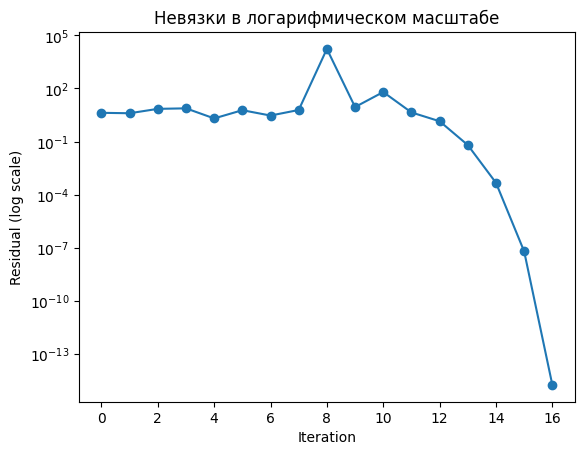

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def obr_parab_iterations(f : function, xs_init, epsilon = 0.001, max_iter = 5000, nevyazki = None):
    x0,x1,x2 = xs_init
    f0,f1,f2 = f(x0), f(x1), f(x2)

    for i in range(max_iter):
        if(f2==f1 or f1==f0 or f2 == f0):
            break
        if nevyazki is not None:
            nevyazki.append(abs(f0))
        if(abs(f0)<epsilon):
            break
        a2 = f1*f0/(f2-f1)/(f2-f0)
        a1 = f2*f0/(f1-f2)/(f1-f0)
        a0 = f2*f1/(f0-f2)/(f0-f1)
        x_new = a0*x0 + a1*x1 + a2*x2
        f2,f1,f0 = f1,f0,f(x_new)
        x2,x1,x0 = x1,x0,x_new
    return x0 
    
test_function = lambda x: x**3 + 0.2*x**2 - 5*x + 6 # для косинуса этот метод не подходит
test_function_2 = lambda x: 0.5 - np.cos(x) # для косинуса этот метод не подходит
nevyazki = []
print(obr_parab_iterations(test_function, (-3,0,1), epsilon=10**-9, nevyazki=nevyazki))
plt.semilogy(range(len(nevyazki)), nevyazki, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Residual (log scale)')
plt.title('Невязки в логарифмическом масштабе')
plt.show()

-1.0471975511965976


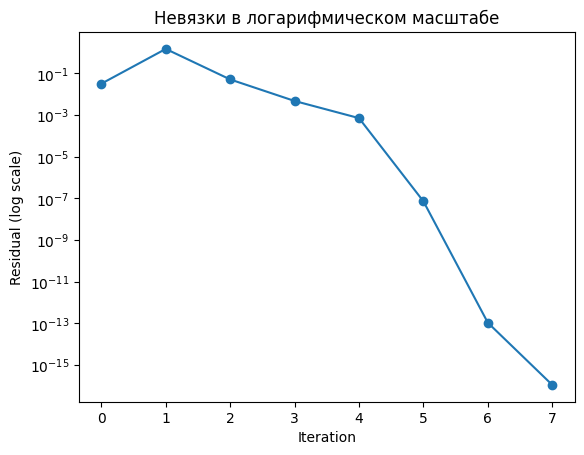

In [108]:
#все же для косинуса, но пошевелить начальные  условия
nevyazki = []
print(obr_parab_iterations(test_function_2, (-1.01,0,1), epsilon=10**-15, nevyazki=nevyazki))
plt.semilogy(range(len(nevyazki)), nevyazki, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Residual (log scale)')
plt.title('Невязки в логарифмическом масштабе')
plt.show()

start=-1 -> root≈1.0471975511965967
start=0 -> root≈1.047197551196597
start=1 -> root≈1.047197551196597


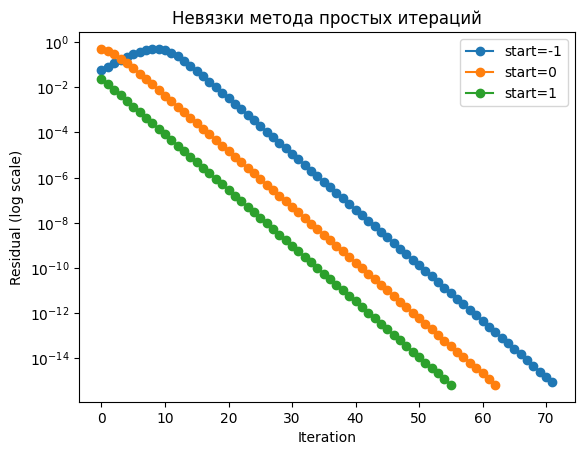

In [117]:
def simple_iteration(f, x0, phi=None, alpha=0.5, epsilon=1e-9, max_iter=5000, nevyazki=None):
        if phi is None:
            phi = lambda x: x - alpha * f(x)

        x = x0
        for i in range(max_iter):
            x_new = phi(x)
            r = abs(f(x_new))
            if nevyazki is not None:
                nevyazki.append(r)
            if r < epsilon or abs(x_new - x) < epsilon:
                return x_new
            x = x_new
        return x

# Пример применения для уравнения 0.5 - cos x = 0 с тремя начальными приближениями
inits = [-1, 0, 1]
for x_init in inits:
    nevyazki_si = []
    root = simple_iteration(test_function_2, x_init, alpha=0.5, epsilon=1e-15, nevyazki=nevyazki_si)
    print(f"start={x_init} -> root≈{root}")
    plt.semilogy(range(len(nevyazki_si)), nevyazki_si, marker='o', label=f'start={x_init}')

plt.xlabel('Iteration')
plt.ylabel('Residual (log scale)')
plt.title('Невязки метода простых итераций')
plt.legend()
plt.show()
